In [1]:
from specim_test.specim.specfuncs import spec2d, spec1d, echelle1d
from keckcode_test.keckcode.esiredux import esi2d
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [3]:
sp_esi = esi2d.Esi2d('../galaxy_spectra/ESI_data/2018/J0147+4630_0031_var.fits')

Order  Shape    Dispaxis
----- --------- --------
  1   3461x165     x
  2   4093x145     x
  3   4096x146     x
  4   4096x141     x
  5   4096x130     x
  6   4096x127     x
  7   4096x124     x
  8   4096x121     x
  9   4096x117     x
 10   4096x111     x


(3196,) (3196,)
 Spectrum Start:  5810.63
 Spectrum End:     6560.55
 Dispersion (1st pixel):   0.22
 Dispersion (average):      0.23

(3496,) (3496,)
 Spectrum Start:  6380.37
 Spectrum End:     7286.41
 Dispersion (1st pixel):   0.24
 Dispersion (average):      0.26

(3896,) (3896,)
 Spectrum Start:  7066.66
 Spectrum End:     8193.74
 Dispersion (1st pixel):   0.27
 Dispersion (average):      0.29

(4096,) (4096,)
 Spectrum Start:  8012.11
 Spectrum End:     9360.83
 Dispersion (1st pixel):   0.30
 Dispersion (average):      0.33

(2500,) (2500,)
 Spectrum Start:  9337.74
 Spectrum End:    10267.76
 Dispersion (1st pixel):   0.35
 Dispersion (average):      0.37



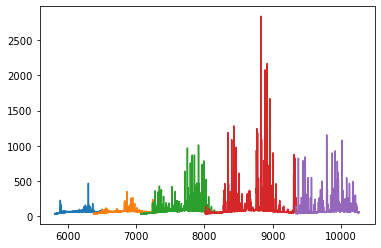

In [4]:
#%matplotlib notebook
sky_1d_list = []
for i, sp in enumerate(sp_esi[5:]):
    pmin = sp_esi.ordinfo[i+5]['pixmin']
    pmax = sp_esi.ordinfo[i+5]['pixmax']
    if pmax == -1:
        if i+5==9:
            sky_data = np.nanmedian(sp.data[:, pmin:2500], axis=0)
            sp.get_wavelength()
            wav_data = sp.wavelength[pmin:2500]
        else:
            sky_data = np.nanmedian(sp.data[:, pmin:], axis=0)
            sp.get_wavelength()
            wav_data = sp.wavelength[pmin:]
    print(wav_data.shape, sky_data.shape)
    plt.plot(wav_data, sky_data)
    sky_1d_list.append(spec1d.Spec1d(wav=wav_data, flux=sky_data, var=sky_data))

In [5]:
orderinfo = np.array([6, 7, 8, 9, 10], dtype=[('order', int)])

In [6]:
outspec = echelle1d.Ech1d(sky_1d_list, ordinfo=orderinfo)

Ord N_pix lam_start lam_end  dispave
--- ----- --------- -------- -------
  6  3196   5810.63  6560.55   0.23
  7  3496   6380.37  7286.41   0.26
  8  3896   7066.66  8193.74   0.29
  9  4096   8012.11  9360.83   0.33
 10  2500   9337.74 10267.76   0.37


In [7]:
outspec.stitch_to_spec1d(resp_corr=False, order=[6, 10]) # sky spectra doesn't need response correction

 Spectrum Start:     3.76
 Spectrum End:        4.01
 Dispersion (1st pixel): 1.65e-05
 Dispersion (average):    1.65e-05



In [8]:
outspec.spec1d.save('J0147_ESI_spectra/J0147_esi_31_sky_1d.fits', outformat='fits')

Saved spectrum to file J0147_ESI_spectra/J0147_esi_31_sky_1d.fits in format fits


<IPython.core.display.Javascript object>


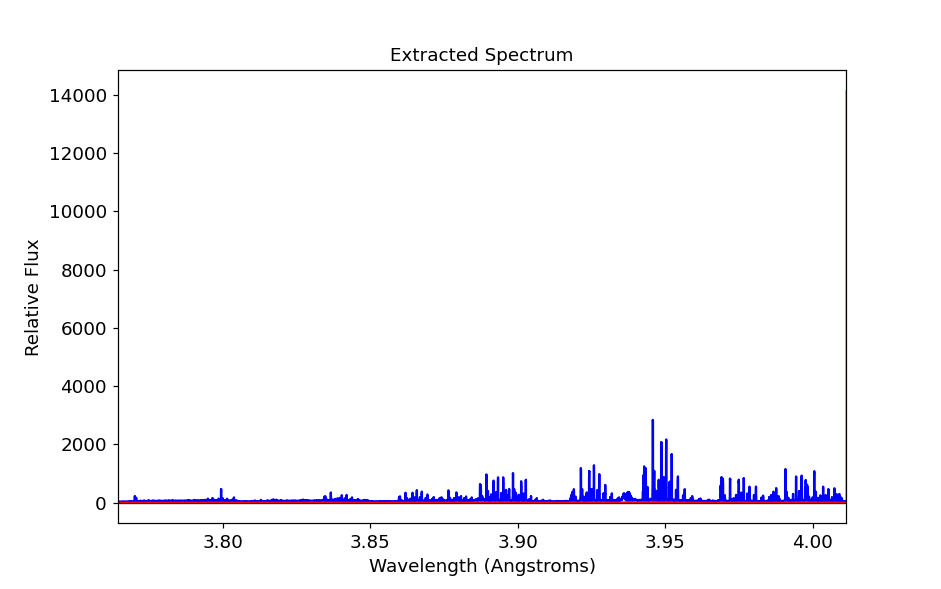

In [80]:
%matplotlib notebook
outspec.spec1d.plot()

In [31]:
sp_esi.ordinfo[5:]

order,name,pixscale,pixmin,pixmax
int64,bytes8,float64,int64,int64
6,Order_06,0.149,900,-1
7,Order_07,0.153,600,-1
8,Order_08,0.158,200,-1
9,Order_09,0.163,0,-1
10,Order_10,0.168,0,-1


In [9]:
sp_esi = esi2d.Esi2d('../galaxy_spectra/ESI_data/2019_04/J0818-2613_0038_var.fits')

Order  Shape    Dispaxis
----- --------- --------
  1   3466x163     x
  2   4093x154     x
  3   4096x147     x
  4   4096x140     x
  5   4096x136     x
  6   4096x128     x
  7   4096x126     x
  8   4096x121     x
  9   4096x116     x
 10   4096x115     x


(3196,) (3196,)
 Spectrum Start:  5811.95
 Spectrum End:     6562.05
 Dispersion (1st pixel):   0.22
 Dispersion (average):      0.23

(3496,) (3496,)
 Spectrum Start:  6381.83
 Spectrum End:     7288.07
 Dispersion (1st pixel):   0.24
 Dispersion (average):      0.26

(3896,) (3896,)
 Spectrum Start:  7068.28
 Spectrum End:     8195.60
 Dispersion (1st pixel):   0.27
 Dispersion (average):      0.29

(4096,) (4096,)
 Spectrum Start:  8013.63
 Spectrum End:     9362.61
 Dispersion (1st pixel):   0.30
 Dispersion (average):      0.33

(2500,) (2500,)
 Spectrum Start:  9338.81
 Spectrum End:    10268.93
 Dispersion (1st pixel):   0.35
 Dispersion (average):      0.37



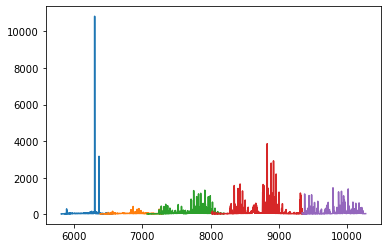

In [10]:
sky_1d_list = []
for i, sp in enumerate(sp_esi[5:]):
    pmin = sp_esi.ordinfo[i+5]['pixmin']
    pmax = sp_esi.ordinfo[i+5]['pixmax']
    if pmax == -1:
        if i+5==9:
            sky_data = np.nanmedian(sp.data[:, pmin:2500], axis=0)
            sp.get_wavelength()
            wav_data = sp.wavelength[pmin:2500]
        else:
            sky_data = np.nanmedian(sp.data[:, pmin:], axis=0)
            sp.get_wavelength()
            wav_data = sp.wavelength[pmin:]
    print(wav_data.shape, sky_data.shape)
    plt.plot(wav_data, sky_data)
    sky_1d_list.append(spec1d.Spec1d(wav=wav_data, flux=sky_data, var=sky_data))

In [11]:
orderinfo = np.array([6, 7, 8, 9, 10], dtype=[('order', int)])
outspec = echelle1d.Ech1d(sky_1d_list, ordinfo=orderinfo)
outspec.stitch_to_spec1d(resp_corr=False, order=[6, 10]) # sky spectra doesn't need response correction

Ord N_pix lam_start lam_end  dispave
--- ----- --------- -------- -------
  6  3196   5811.95  6562.05   0.23
  7  3496   6381.83  7288.07   0.26
  8  3896   7068.28  8195.60   0.29
  9  4096   8013.63  9362.61   0.33
 10  2500   9338.81 10268.93   0.37
 Spectrum Start:     3.76
 Spectrum End:        4.01
 Dispersion (1st pixel): 1.65e-05
 Dispersion (average):    1.65e-05



In [12]:
outspec.spec1d.save('J0818_ESI_spectra/J0818_esi_38_sky_1d.fits', outformat='fits')

Saved spectrum to file J0818_ESI_spectra/J0818_esi_38_sky_1d.fits in format fits


In [13]:
sp_esi = esi2d.Esi2d('../galaxy_spectra/ESI_data/2019_04/J1817+2729_0049_var.fits')

Order  Shape    Dispaxis
----- --------- --------
  1   3466x163     x
  2   4093x154     x
  3   4096x147     x
  4   4096x140     x
  5   4096x136     x
  6   4096x128     x
  7   4096x126     x
  8   4096x121     x
  9   4096x116     x
 10   4096x115     x


(3196,) (3196,)
 Spectrum Start:  5811.95
 Spectrum End:     6562.05
 Dispersion (1st pixel):   0.22
 Dispersion (average):      0.23

(3496,) (3496,)
 Spectrum Start:  6381.83
 Spectrum End:     7288.07
 Dispersion (1st pixel):   0.24
 Dispersion (average):      0.26

(3896,) (3896,)
 Spectrum Start:  7068.28
 Spectrum End:     8195.60
 Dispersion (1st pixel):   0.27
 Dispersion (average):      0.29

(4096,) (4096,)
 Spectrum Start:  8013.63
 Spectrum End:     9362.61
 Dispersion (1st pixel):   0.30
 Dispersion (average):      0.33

(2500,) (2500,)
 Spectrum Start:  9338.81
 Spectrum End:    10268.93
 Dispersion (1st pixel):   0.35
 Dispersion (average):      0.37



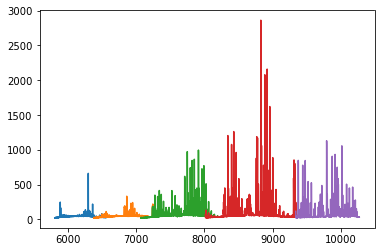

In [14]:
sky_1d_list = []
for i, sp in enumerate(sp_esi[5:]):
    pmin = sp_esi.ordinfo[i+5]['pixmin']
    pmax = sp_esi.ordinfo[i+5]['pixmax']
    if pmax == -1:
        if i+5==9:
            sky_data = np.nanmedian(sp.data[:, pmin:2500], axis=0)
            sp.get_wavelength()
            wav_data = sp.wavelength[pmin:2500]
        else:
            sky_data = np.nanmedian(sp.data[:, pmin:], axis=0)
            sp.get_wavelength()
            wav_data = sp.wavelength[pmin:]
    print(wav_data.shape, sky_data.shape)
    plt.plot(wav_data, sky_data)
    sky_1d_list.append(spec1d.Spec1d(wav=wav_data, flux=sky_data, var=sky_data))

In [15]:
orderinfo = np.array([6, 7, 8, 9, 10], dtype=[('order', int)])
outspec = echelle1d.Ech1d(sky_1d_list, ordinfo=orderinfo)
outspec.stitch_to_spec1d(resp_corr=False, order=[6, 10]) # sky spectra doesn't need response correction

Ord N_pix lam_start lam_end  dispave
--- ----- --------- -------- -------
  6  3196   5811.95  6562.05   0.23
  7  3496   6381.83  7288.07   0.26
  8  3896   7068.28  8195.60   0.29
  9  4096   8013.63  9362.61   0.33
 10  2500   9338.81 10268.93   0.37
 Spectrum Start:     3.76
 Spectrum End:        4.01
 Dispersion (1st pixel): 1.65e-05
 Dispersion (average):    1.65e-05



In [16]:
outspec.spec1d.save('J1817_ESI_spectra/J1817_esi_49_sky_1d.fits', outformat='fits')

Saved spectrum to file J1817_ESI_spectra/J1817_esi_49_sky_1d.fits in format fits
